# データ処理と可視化

本章から最終 15 章まで機械学習にデータの前処理や機械学習アルゴリズムの実装など、機械学習に関するプログラミングについて学んでいきます。  
まず入門として、データ解析において必須となる Python のパッケージである Pandas と Matplotlib を用いたデータの取扱いを練習しましょう。  

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 本章の構成
- Pandas によるデータ処理の基礎  
- Matplotlib によるデータ可視化の基礎  


## Pandas によるデータ処理の基礎

Pandas は Python を用いたデータ解析で最も頻繁に用いられるパッケージの 1 つであり、CSV データの読み込み・条件抽出・加工などデータ整理全般で使用します。  

本節では Pandas の代表的な機能の使い方を説明します。  

- CSV ファイルの読み込み  
- 基礎統計量の算出  
- データの並べ替え  
- 入力変数と教師データの分割  
- 欠損値の除去 / 補間  
- カテゴリカル変数の取り扱い  

まず Pandas パッケージを読み込みましょう。  
`pandas` は `pd` という別名を与えて用いるのが一般的です。  

In [75]:
import pandas as pd

### CSV ファイルの読み込み

データセットは Colab で用意されているサンプルデータを使用します。  
Colab 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)をダウンロードして、使用してください。

**Colab へのファイルのアップロード**  

アップロード方法は下記の画像に従ってください。ファイルをアップロードする前にノートブックがサーバーに接続されていることを確認してください。    

![Google Colaboratory へのファイルのアップロード](http://drive.google.com/uc?export=view&id=1JtlmI-iagQya27eadl-G3fuDTxsEr2VX)

![Google Colaboratory へのファイルのアップロード 2](http://drive.google.com/uc?export=view&id=1F64jQuUbK_QqiJMtAONgmWrCQK-vcQO3)

ファイルタブをクリックし、アップロードのボタンをクリックするとファイルを選択し、アップロードを行うことができます。  
もし、新規のフォルダを作成して、ファイルのアップロードを行う際は、右クリックから新しいフォルダを選択し、新規フォルダを作成した後にファイルをアップロードします。

Pandas では CSV ファイルを読み込むための `pd.read_csv()` という関数が用意されています。
こちらを使って CSV ファイルを読み込みます。

In [76]:
# データセットの読み込み
df = pd.read_csv('sample_data/california_housing_train.csv')

`df` という変数名は、**データフレーム (data frame)** という Pandas で中心的に用いられる**データ構造 (data structure)** を表すクラスの名前の頭文字に由来しています。
`pd.read_csv()` 関数は、CSV ファイルの内容を `DataFrame` オブジェクトに読み込みます。

In [77]:
# 型の確認
type(df)

pandas.core.frame.DataFrame

`df` に読み込まれたデータの中身の確認してみましょう。
ノートブック上では、大きな DataFrame を表示しようとすると自動的に一部が省略されることがあります。

In [78]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


データを数件のみ確認したい場合は、データフレームがもつ `df.head()` メソッドを使用します。
`df.head()` はデフォルトで先頭から 5 件のデータを表示しますが、`df.head(3)` のように引数に表示したいデータ件数を指定すると、指定された件数だけを表示することもできます。
それでは、`df.head()` を実行してみましょう。

In [79]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [80]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


特定の列を抽出したい場合は、`df` に対し、Python の辞書オブジェクトに行うように `[]` を使って取り出したい列の名前を指定します。

In [81]:
df['longitude'].head()

,longitude
0,-114.31
1,-114.47
2,-114.56
3,-114.57
4,-114.57


Pandas では行列をデータフレーム型 (`DataFrame`) 、上記のようなベクトルをシリーズ型 (`Series`) と呼ぶ点も覚えておくとエラーの対処などが楽になるので覚えておきましょう。

In [82]:
type(df['longitude'])

pandas.core.series.Series

データフレームの行・列数を確認するには `.shape` 属性に保存されています。  
1 つ目の要素が行数、2 つ目の要素が列数を表します。今回のデータセットの行数は 17,000 、列数が 9 であることが確認できます。データセットを読み込んだ際にはまずはデータの行・列数を確認するようにしましょう。  

In [83]:
df.shape

(17000, 9)

### 基礎統計量の算出
データフレームには、読み込んだデータの統計量を計算するためのメソッドも用意されています。

In [84]:
# 平均
df.mean()

,0
longitude,-119.562108
latitude,35.625225
housing_median_age,28.589353
total_rooms,2643.664412
total_bedrooms,539.410824
population,1429.573941
households,501.221941
median_income,3.883578
median_house_value,207300.912353


In [85]:
# 分散
df.var()

,0
longitude,4.020692e+00
latitude,4.568221e+00
housing_median_age,1.584310e+02
total_rooms,4.752169e+06
total_bedrooms,1.776618e+05
population,1.317566e+06
households,1.478563e+05
median_income,3.641061e+00
median_house_value,1.345223e+10


In [86]:
# 標準偏差
df.std()

,0
longitude,2.005166
latitude,2.137340
housing_median_age,12.586937
total_rooms,2179.947071
total_bedrooms,421.499452
population,1147.852959
households,384.520841
median_income,1.908157
median_house_value,115983.764387


In [87]:
# 各列の None, NaN, NaT のいずれでもない値の数
df.count()

,0
longitude,17000
latitude,17000
housing_median_age,17000
total_rooms,17000
total_bedrooms,17000
population,17000
households,17000
median_income,17000
median_house_value,17000


ここで、データの特徴をおおまかに調べるために便利な `df.describe()` メソッドを実行してみましょう。  
基礎統計量と呼ばれる平均値、標準偏差などを一覧で表示する事が出来ます。  

In [88]:
# 基礎統計量を一覧表示
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


また、もうひとつ便利なメソッドに相関係数を算出する `df.corr()` があります。
入力変数間や入出力間の相関係数を確認することができます。

In [89]:
# 相関係数の算出
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


### データの並べ替え

データフレームのある列を抽出し、`df.sort_values()` メソッドを呼び出すことで値の**並べ替え (sort)** を行うことができます。
なお、このメソッドは並べ替えが終わったあとの値でもとのデータフレーム内の値を置き換えることまでは行わず、結果を返します。
そこで、別の変数で結果を受け取り、始めの 5 行を表示することで並べ替えが行われたことを確認してみましょう。

`df.sort_values()` は、デフォルトでは**昇順 (ascending)** に並べ替えを行います。昇順とは、だんだん値が大きくなっていくように並べ替えるときの並べ方のことで、逆にだんだん値が小さくなっていくように並べ替えるときは、**降順 (descending)** に並べると言います。

`df.sort_values()` は並べ替えを行いたい列の名前を `by` という引数で受け取ります。また、デフォルトでは昇順に並べ替えを行います。  
Colab 上では、メソッドを記述し、`()` 内にカーソルを合わせると必要な引数が自動的に表示されます。  
また、メソッドを持つ値に `.` を入力すると候補となるメソッド一覧が表示されます。

In [90]:
# total_rooms 列の値を昇順に並べ替え
df_as = df.sort_values(by='total_rooms')

In [91]:
df_as.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0
16309,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0
8188,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0
15369,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0
4502,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0


降順に並べ替える場合は、`ascending=False` という引数の指定を行います。

In [92]:
# total_rooms の列の値を降順に並べ替え
df_de = df.sort_values(by='total_rooms', ascending=False)

In [93]:
df_de.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
8881,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0
1116,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0


### インデックス指定によるデータの選択

機械学習を行う際には用意した CSV データをそのまま使用することは非常に稀です。情報を適切に取捨選択することがモデルの予測性能を高める上でとても重要なので、データの行・列を選択して必要なデータを抽出する手順を抑える必要があります。  

列や行の選択を行う方法は複数ありますが、ここでは整数インデックスを用いてデータの部分選択を行う `df.iloc[]` を紹介します。

In [94]:
# データの確認
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [95]:
# df.iloc[行, 列]
# 0 行目 longitude 列の選択
df.iloc[0, 0]

-114.31

In [96]:
# 1 行目 latitude 列の選択
df.iloc[1, 1]

34.4

前章で学んだ NumPy の Array のスライス方法と同様に `:` で全ての値を指定することができます。  
また、負のインデックスを用いると、末尾の要素から数えた位置指定を行うこともできます。

In [97]:
# すべての行の、先頭の列から末尾の列のひとつ手前までを選択
x = df.iloc[:, 0:-1]

In [98]:
# 先頭の5件の表示
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


次のように先頭位置を省略した記述も可能です。  

In [99]:
# すべての行の、先頭の列から末尾の列のひとつ手前までを選択
x = df.iloc[:, :-1]

In [100]:
# 先頭の5件の表示
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


### 条件指定によるデータの選択

次に、条件指定してデータの選択を行う方法を紹介します。

まず `median_house_value` 列を選択し、比較演算子を使って**各要素に対する条件**を指定し、条件を満たすかどうかを全要素に対して調べた結果を取得してみましょう。

In [101]:
# median_house_value 列を選択し、全要素に対し 70000 より大きいかどうかを計算
mask = df['median_house_value'] > 70000

In [102]:
mask.head()

,median_house_value
0,False
1,True
2,True
3,True
4,False


このように、比較演算子の片方の辺にデータフレームやシリーズをおくと、指定された条件を満たすかどうかを全ての要素に対して計算することができます。
結果は、各要素が条件を満たすか、満たさないかを表す `True`、`False` が各要素の位置に格納されたデータフレームやシリーズとなります。
これを**マスク (mask)** と呼ぶことがあります。

そして、データフレームやシリーズも NumPy の ndarray と同様に、マスクを使って要素を選択することができます。
上の `mask` を `df` に `[]` を使って与えることで、指定した条件を満たす要素だけを取り出すことができます。

In [103]:
# df[mask] の先頭 5 件を表示
df[mask].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


### 複数の条件指定による要素の選択
複数の条件を組み合わせて要素を選択することもでき、**論理和 (or)** は `|`、**論理積 (and)** は `&` を用いて記述します。

In [104]:
# 70000 より小さい または 80000 より大きい
mask2 = (df['median_house_value'] < 70000) | (df['median_house_value'] > 80000)

In [105]:
mask2.head()

,median_house_value
0,True
1,True
2,True
3,False
4,True


In [106]:
df[mask2].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


In [107]:
# 70000 より大きい かつ 80000 より小さい
mask3 = (df['median_house_value'] > 70000) & (df['median_house_value'] < 80000)

In [108]:
mask3.head()

,median_house_value
0,False
1,False
2,False
3,True
4,False


In [109]:
df[mask3].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0


条件に当てはまる要素を調べる操作と、条件に当てはまる要素の選択まで、1 行にまとめて書くこともできます。

In [110]:
df[(df['median_house_value'] > 70000) & (df['median_house_value'] < 80000)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0


### 欠損値の除去・補完

データの一部に欠落が存在する場合、該当箇所を欠損値と呼び、 `NaN` (Not a Number)、`None`、`NaT` (Not a Time) などで表示されます。基本的に機械学習のアルゴリズムにデータを適用する際にこのような欠損値は事前に取り除くなどの対処の必要があります。  

最も簡単な方法としては、欠損値を含む行（または列）全体を除去する方法があります。  
他にも平均値・最頻値など何らかの値で欠損値を補完する方法があります。  

まずは、欠損値を除去する方法を紹介します。

In [111]:
# 演習の為に欠損値を人為的に作成
df.iloc[0, 0] = None

In [112]:
# (0, 'longitude') の要素が NaN になっていることを確認
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NaN,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [113]:
# 欠損値のあるレコードを削除
df_dropna = df.dropna()

# 先頭から 3 件を表示
df_dropna.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0


上の結果と見比べると、`NaN` を含んでいた 0 行目のデータが取り除かれていることが分かります。

次に、平均値を使った欠損値の補完を行います。

In [114]:
# 補完に使用する平均値を計算
mean = df.mean()
mean

,0
longitude,-119.562417
latitude,35.625225
housing_median_age,28.589353
total_rooms,2643.664412
total_bedrooms,539.410824
population,1429.573941
households,501.221941
median_income,3.883578
median_house_value,207300.912353


計算した各列の値の平均が格納されている `mean` を、`df.fillna()` メソッドに渡すことで、`mean` を用いた欠損値の補完を行うことができます。

In [115]:
# 欠損値を mean で補完
df_fillna =  df.fillna(mean)

# 先頭から 3 件を表示
df_fillna.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.562417,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.470000,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.560000,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


`longitude` 列の 0 行目のデータが 、`mean` の `longitude` の値で補完されていることが確認できます。

今回は欠損値が 1 箇所にだけあるデータを用いましたが、`df.dropna()` や `df.fillna()` は、対象の全ての欠損値に対して上記のような操作を行うメソッドです。

### 練習問題 Pandas によるデータ処理の基礎

Pandasの基礎的な操作方法を復習しましょう。下記の内容を次のセルに記述し、実行結果を確認してください。（必要に応じてセルの追加を行ってください。）  

- `sample_data/california_housing_train.csv` のファイルから再度 CSV ファイルの読み込み `df2` という変数に格納
- 読み込んだデータセットの各列のデータ数、平均、標準偏差、最小値、最大値などの確認
- 1 列目から `median_income` の列までを切り出し、`x` という変数に格納
- `median_house_value` の列を切り出し、`t` という変数に格納
- `t` の値が 450000 以上のデータを抽出
- 上記の抽出したデータを降順に並び替えて値の確認

*ヒント*  
`median_income` の列は後ろから 2 列目に該当します。うまく負の値を用いて切り出しましょう。  

In [116]:
# CSV ファイルの読み込み
df2 = pd.read_csv('sample_data/california_housing_train.csv')
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [117]:
# データの基礎的な統計量の確認
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [118]:
# データの切り分け： 1 列目から median_income → x
x = df2.iloc[:, :-1]
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [119]:
# データの切り分け： median_house_value → t
t = df2.iloc[:, -1]
t.head()

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [120]:
# データの条件抽出：マスクの作成
mk = (t > 450000)

In [121]:
# データの条件抽出と降順で並び替え
t[mk].sort_values(ascending=False)

,median_house_value
16512,500001.0
215,500001.0
16181,500001.0
16208,500001.0
16209,500001.0
...,...
8583,450700.0
3545,450700.0
13441,450400.0
3048,450400.0


#### 模範解答

In [122]:
# CSV ファイルの読み込み
df2 = pd.read_csv('sample_data/california_housing_train.csv')
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [123]:
# データの基礎的な統計量の確認
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [124]:
# データの切り分け： 1 列目から median_income → x
x = df2.iloc[:, :-1]
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [125]:
# データの切り分け： median_house_value → t
t = df2.iloc[:, -1]
t.head()

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [126]:
# データの条件抽出：マスクの作成
mask = (t > 450000)

In [127]:
# データの条件抽出と降順で並び替え
t[mask].sort_values(ascending=False)

,median_house_value
16512,500001.0
215,500001.0
16181,500001.0
16208,500001.0
16209,500001.0
...,...
8583,450700.0
3545,450700.0
13441,450400.0
3048,450400.0


## Matplotlib によるデータ可視化の基礎


データフレームを見ただけでは直感的にデータの特徴を理解することは簡単ではありません。  
データを直感的に理解するにはデータの可視化が有効です。Python でのデータの可視化にはよく [Matplotlib](https://matplotlib.org/) というパッケージを用いることが多いです。Matplotlib を用いてのデータの可視化を行いましょう。    
Matplotlib は `matplotlib.pyplot` を `plt` という別名をつけて読み込むのが一般的です。

In [128]:
import matplotlib.pyplot as plt

### 散布図

**散布図 (scatter)** は変数間の相関を視覚的に確認したり、データのばらつきや値の範囲を視覚的に確認するのに便利なものです。
Matplotlib では与えられた配列から散布図を作成する `plt.scatter()` が用意されています。

まずは、`median_income` 列のデータと `median_house_value` 列のデータをそれぞれ横軸、縦軸に取った散布図を描画してみましょう。

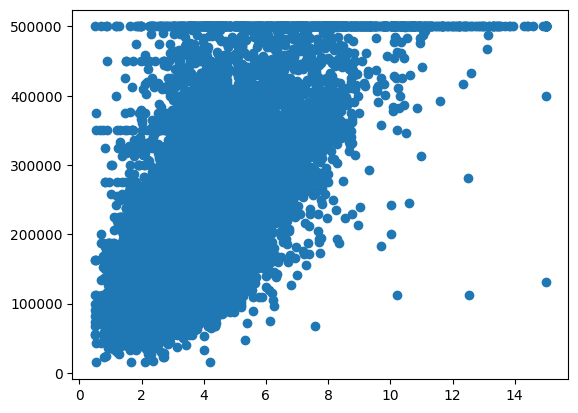

In [129]:
plt.scatter(df['median_income'], df['median_house_value'])

次に、`pupulation` 列の値と `median_house_value` 列の値をそれぞれ横軸と縦軸にとった散布図を描画します。

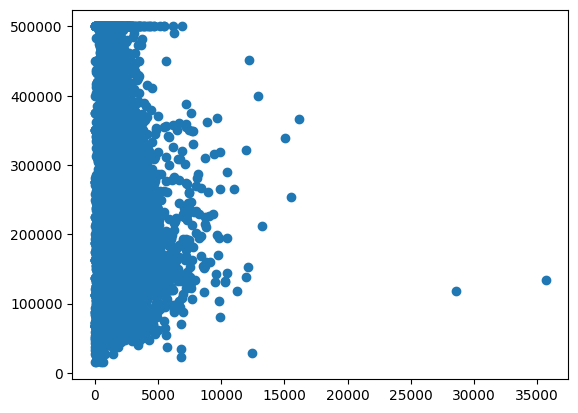

In [130]:
plt.scatter(df['population'], df['median_house_value'])

### ヒストグラム

データ中にどのような値がよく登場しているかという値ごとの頻度を確認するために使われるものに**ヒストグラム (histogram)** があります。

試しに、`median_house_values` 列の値のヒストグラムを描画してみましょう。

(array([ 731., 2958., 3362., 3127., 2291., 1426., 1036.,  629.,  395.,
        1045.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

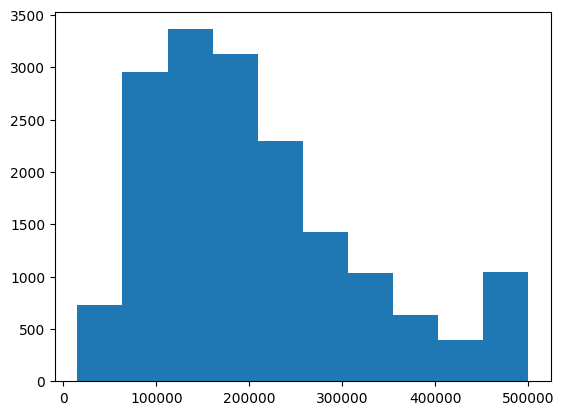

In [131]:
plt.hist(df['median_house_value'])

上図の棒グラフ 1 つ 1 つの青い棒は、**ビン (bin)** と呼ばれ、それぞれの高さはある値の範囲に入っているサンプルの数を表します。
ヒストグラムでは値の範囲を複数指定し、それぞれの範囲に入っているサンプルの個数を描画します。
そのため、その値の範囲の指定を `bins` という引数を用いて行う必要があります。
ただし、この引数はオプショナル（設定が必須ではない）なもので、何も与えなかった場合はビンの数が自動的に決定されます。
この引数に整数を与えた場合は、`bins` 個のビンを値の範囲に対して等間隔に作成します。

(array([  8.,  12.,  51., 214., 446., 559., 463., 658., 704., 574., 685.,
        588., 675., 670., 744., 799., 627., 684., 584., 433., 500., 547.,
        484., 406., 358., 370., 362., 267., 257., 166., 184., 197., 199.,
        216., 240., 159., 134., 126.,  98., 112.,  88.,  80.,  69.,  67.,
         91.,  50.,  42.,  44.,  42., 867.]),
 array([ 14999.  ,  24699.04,  34399.08,  44099.12,  53799.16,  63499.2 ,
         73199.24,  82899.28,  92599.32, 102299.36, 111999.4 , 121699.44,
        131399.48, 141099.52, 150799.56, 160499.6 , 170199.64, 179899.68,
        189599.72, 199299.76, 208999.8 , 218699.84, 228399.88, 238099.92,
        247799.96, 257500.  , 267200.04, 276900.08, 286600.12, 296300.16,
        306000.2 , 315700.24, 325400.28, 335100.32, 344800.36, 354500.4 ,
        364200.44, 373900.48, 383600.52, 393300.56, 403000.6 , 412700.64,
        422400.68, 432100.72, 441800.76, 451500.8 , 461200.84, 470900.88,
        480600.92, 490300.96, 500001.  ]),
 <BarContainer object o

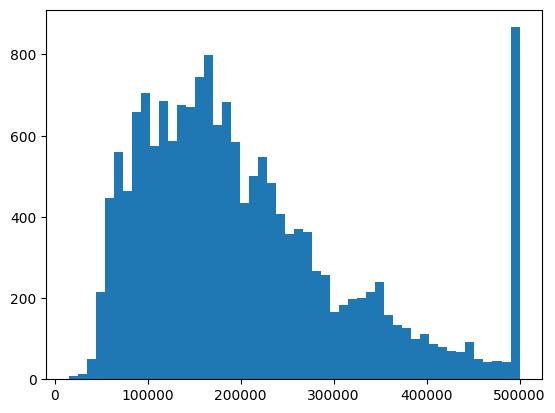

In [132]:
# bins 引数に値を指定することで、ビンの数を指定できます
plt.hist(df['median_house_value'], bins=50)

上図から、`median_house_value` が 500,000 付近の値をとるサンプルが突出して多く存在していることが分かります。

### 箱ひげ図

**箱ひげ図 (box plot)** は、値のばらつきをわかりやすく表現するための図です。
`df.describe()` で確認できるような、いくつかの統計値をまとめて可視化するものです。
箱ひげ図は、**五数要約 （ five-number summary ）** と呼ばれる以下の統計量をまとめて表すものです。

- 最小値 (minimum)
- 第 1 四分位点 (lower quartile) : 全体の 1/4
- 中央値 (median)
- 第 3 四分位点 (upper quartile) : 全体の 3/4
- 最大値 (maximum)

また、黒の点はそのデータの外れ値を個々に表しています。`plt.boxplot()` の外れ値の定義に関してはこちらの[公式リファレンス](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)の `whis` パラメータを確認してください。  

描画には、`plt.boxplot()` を用います。

{'whiskers': [<matplotlib.lines.Line2D at 0x7993836067a0>,
 'caps': [<matplotlib.lines.Line2D at 0x799383604e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x799383605ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x79938362d270>],
 'fliers': [<matplotlib.lines.Line2D at 0x79938362d030>],
 'means': []}

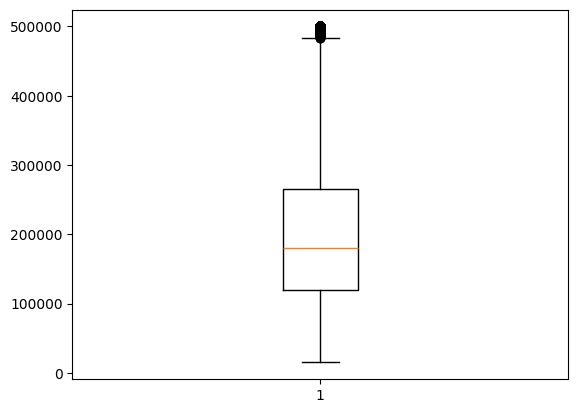

In [133]:
plt.boxplot(df['median_house_value'])

### 折れ線グラフ

折れ線グラフは、時系列データなどを表示する際に便利なグラフです。`plt.plot()` を用いて描画します。  
`plt.plot(y)` のように引数が 1 つの場合は、`y` の要素が縦軸の値に対応し、 横軸は要素のインデックスとなります。

それでは、NumPy を用いて作成したデータを、`plt.plot()` で表示してみましょう。

In [134]:
import numpy as np

# [0,10]の間を100分割して数値を返す
x = np.linspace(0, 10, 100)

# x の値にランダムノイズを加える
y = x + np.random.randn(100)

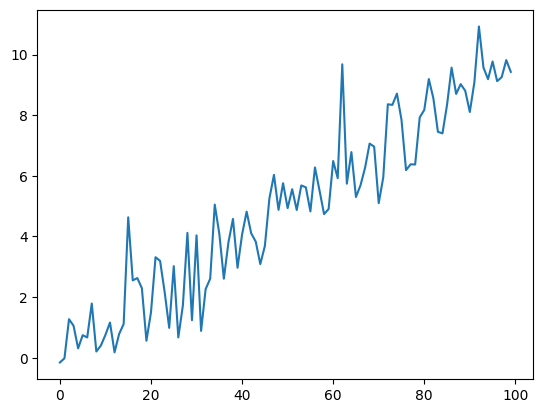

In [135]:
plt.plot(y)

`plt.plot(x, y)` のように引数を 2 つ与える場合は、`x` が横軸、`y` が縦軸に対応します。

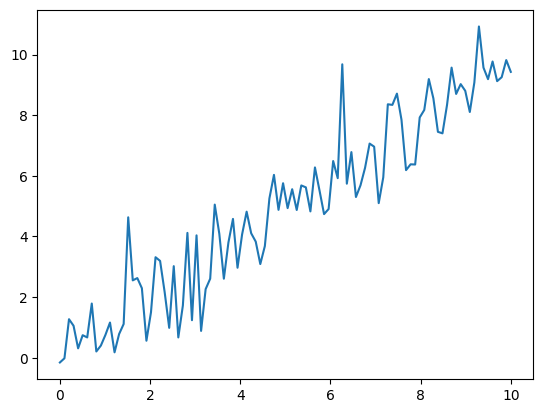

In [136]:
plt.plot(x, y)

### 練習問題 本章のまとめ

本章で学んだ内容を 4 章で学んだ $3σ$ 法を実装し復習しましょう。下記の内容を次のセルに記述し、実行結果を確認してください。（必要に応じてセルの追加を行ってください。）  
最終的に $3σ$ 法を用いて外れ値の除去を行い、データの分布が変わっていることが確認できていればうまく実装できています。  


$3σ$ 法を用いての外れ値除去のイメージは下記の図でした。  
![3σ 法](http://drive.google.com/uc?export=view&id=12DzXwIOUJ7j3pfHw0PBERc9sMJY-SB-s)

数式で確認すると下記になります。

- $\mu$ : 平均
- $\sigma$ : 標準偏差

$$
\mu-3\sigma \leq x \leq  \mu + 3\sigma
$$

- `sample_data/california_housing_train.csv` のファイルから再度 CSV ファイルの読み込み `df3` という変数に格納し、先頭 5 行を確認
- `median_income` の列を切り出し、`t` という変数に格納
- `t` の値をヒストグラムを用いて可視化（引数の `bins` を 50 に設定）
- `t` の平均を変数 `mu` に格納
- `t` の標準偏差を変数 `sigma` に格納
- 上記の数式に基づいて $3σ$ 法を用いて、外れ値除去を行った値を変数 `t2` に格納
- `t2` の値をヒストグラムを用いて可視化（引数の `bins` を 50 に設定）


*ヒント*  

$3σ$ 法を用いての外れ値除去は `mu + 3 * simga` より小さくかつ、`mu - 3 * simga` より大きい `t` の値を抽出します。

In [151]:
# CSV ファイルの読み込み
df3 = pd.read_csv('sample_data/california_housing_train.csv')
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [152]:
# データの確認
df3.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [149]:
# median_income の切り出し → t
t = df3['median_income']
t.head()

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917
4,1.9250


(array([  41.,  125.,  279.,  558.,  830., 1114., 1132., 1280., 1258.,
        1316., 1255., 1040., 1139.,  805.,  781.,  662.,  595.,  495.,
         329.,  385.,  265.,  232.,  143.,  126.,  125.,  117.,   99.,
          70.,   54.,   28.,   24.,   20.,   29.,   48.,   31.,   28.,
          24.,   10.,   10.,    7.,   11.,    9.,    5.,    7.,   10.,
           3.,    2.,    2.,    2.,   40.]),
 array([ 0.4999  ,  0.789904,  1.079908,  1.369912,  1.659916,  1.94992 ,
         2.239924,  2.529928,  2.819932,  3.109936,  3.39994 ,  3.689944,
         3.979948,  4.269952,  4.559956,  4.84996 ,  5.139964,  5.429968,
         5.719972,  6.009976,  6.29998 ,  6.589984,  6.879988,  7.169992,
         7.459996,  7.75    ,  8.040004,  8.330008,  8.620012,  8.910016,
         9.20002 ,  9.490024,  9.780028, 10.070032, 10.360036, 10.65004 ,
        10.940044, 11.230048, 11.520052, 11.810056, 12.10006 , 12.390064,
        12.680068, 12.970072, 13.260076, 13.55008 , 13.840084, 14.130088,
        

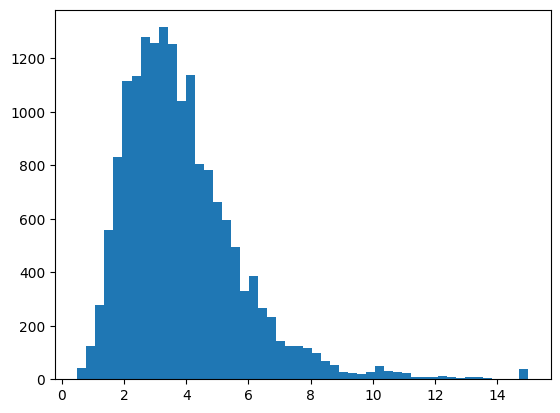

In [146]:
# t をヒストグラムで可視化
plt.hist(t, bins = 50)

In [153]:
# 平均の算出 → mu
mu = t.mean()
mu

3.8835781000000007

In [154]:
# 標準偏差の算出 → sigma
sigma = t.std()
sigma

1.908156518379093

In [155]:
# 3σ 法を用いての外れ値除去 → t2
t2 = t[(t < mu + 3 * sigma) & (t > mu - 3 * sigma)]
t2.head()

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917
4,1.9250


(array([ 512., 2750., 3994., 3657., 2482., 1595.,  924.,  412.,  278.,
         110.]),
 array([0.4999 , 1.41053, 2.32116, 3.23179, 4.14242, 5.05305, 5.96368,
        6.87431, 7.78494, 8.69557, 9.6062 ]),
 <BarContainer object of 10 artists>)

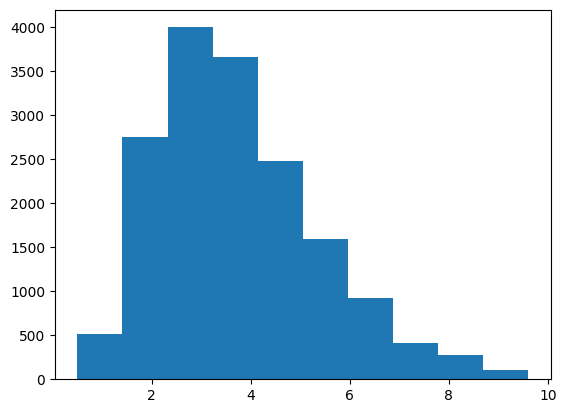

In [156]:
# t2 をヒストグラムで可視化
plt.hist(t2)

<img src="http://drive.google.com/uc?export=view&id=1g2xjXbw5qYeqdJqcOf3uASvzBQxhlE8u" width=30%>